In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [84]:
d = pd.read_csv('loan.csv')

C:\Users\Avinash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d.shape

(887379, 74)

In [143]:
data=d
d.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,defaulted,issue_dt,last_pymnt_dt
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2011-12-01,2015-01-01
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2011-12-01,2013-04-01


In [5]:
d.isnull().mean()   # percentage missing values

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057988
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000005
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                           0.857976
purpose                        0.000000
title                          0.000170
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


## Analysis on Loan

In [6]:
d.loan_amnt.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [7]:
len(d.loan_amnt.unique())

1372

In [8]:
d.loan_status.describe()

count      887379
unique         10
top       Current
freq       601779
Name: loan_status, dtype: object

In [71]:
d.loan_amnt.unique()

array([ 5000.,  2500.,  2400., ..., 32925., 32825., 32575.])

Text(0,0.5,'Number of Loans')

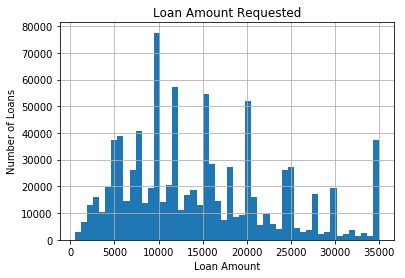

In [72]:
# histogram

fig = d.loan_amnt.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

## Customer annual income

Text(0,0.5,'Number of Customers')

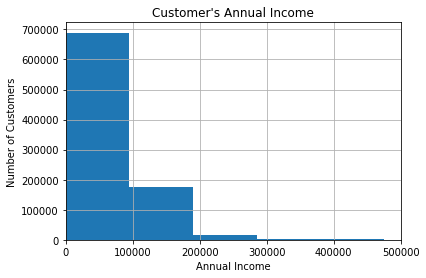

In [78]:
figu = d.annual_inc.hist(bins=100)
figu.set_xlim(0, 500000)
figu.set_title("Customer's Annual Income")
figu.set_xlabel('Annual Income')
figu.set_ylabel('Number of Customers')

## Total number of credit items (for example, credit cards, car loans, mortgages etc)

In [83]:
d.open_acc.unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., nan, 40., 45., 49., 53., 51., 43.,  0.,
       62., 48., 50., 52., 54., 76., 58., 55., 84., 75., 61., 65., 67.,
       57., 66., 68., 70., 60., 56., 82., 63., 59., 64., 79., 74., 90.])

Text(0,0.5,'Number of Customers')

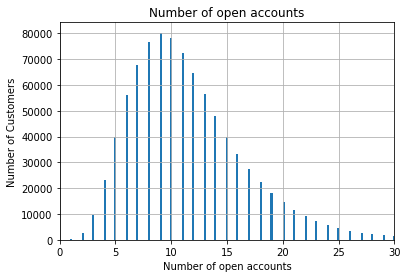

In [85]:
# let's make an histogram to get familiar with the
# distribution of the variable

fig = d.open_acc.hist(bins=500)
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

## Number of installment accounts opened in past 12 months 

In [86]:
data.open_il_12m.unique()

array([nan,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9.,  8., 10., 12.])

Text(0,0.5,'Number of Borrowers')

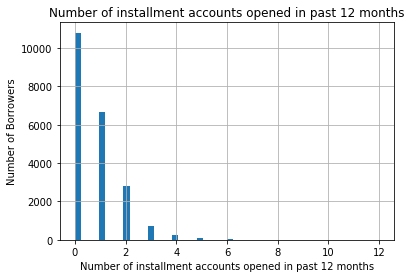

In [87]:
fig = d.open_il_12m.hist(bins=50)
fig.set_title('Number of installment accounts opened in past 12 months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of Borrowers')

## Loan Status

In [88]:
d.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

Text(0,0.5,'Number of customers')

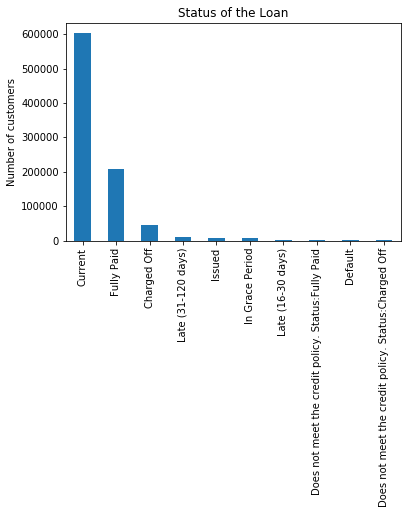

In [115]:
fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')

In [89]:
data[d.loan_status.isin(['Current'])].head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
4,3000.0,12.69,80000.0,Current,15.0,NaN
6,7000.0,15.96,47004.0,Current,7.0,NaN
32,10000.0,15.96,29120.0,Current,11.0,NaN
39,12500.0,12.69,27000.0,Current,6.0,NaN
61,17500.0,17.27,40000.0,Current,5.0,NaN


In [90]:
data[d.loan_status.isin(['Default'])].head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
318,18000.0,17.27,62000.0,Default,8.0,NaN
7620,21250.0,14.27,36000.0,Default,20.0,NaN
11759,5600.0,15.99,52416.0,Default,8.0,NaN
13439,15975.0,20.99,225000.0,Default,10.0,NaN
13856,5000.0,15.99,65004.0,Default,15.0,NaN


In [92]:
data['defaulted'] = np.where(data.loan_status.isin(['Default']), 1, 0)
data.defaulted.mean() #percentage
data.defaulted.value_counts()

0    886160
1      1219
Name: defaulted, dtype: int64

In [93]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,defaulted
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [94]:
data[data.loan_status.isin(['Default'])].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,defaulted
318,1062399,1294261,18000.0,18000.0,17975.000000,60 months,17.27,449.97,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7620,879297,1094167,21250.0,21250.0,21003.604048,60 months,14.27,497.43,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11759,809235,1016031,5600.0,5600.0,5600.000000,60 months,15.99,136.16,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13439,782572,985575,15975.0,15975.0,15975.000000,60 months,20.99,432.09,E,E5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13856,775378,977625,5000.0,5000.0,5000.000000,60 months,15.99,121.57,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [95]:
data.defaulted.unique()

array([0, 1], dtype=int64)

Text(0,0.5,'Number of Loans')

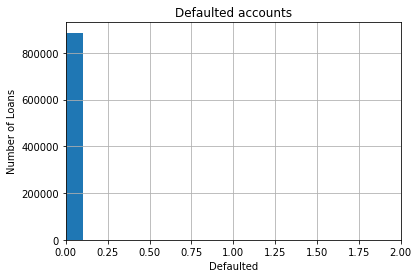

In [104]:
fig = data.defaulted.hist()
fig.set_xlim(0, 2)
fig.set_title('Defaulted accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

Text(0,0.5,'Number of Loans')

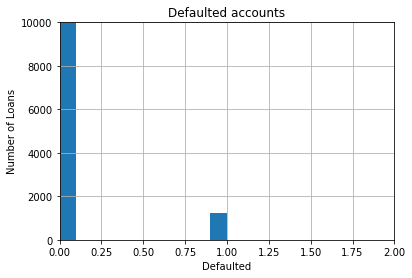

In [105]:
fig = data.defaulted.hist()
fig.set_xlim(0, 2)
fig.set_ylim(0, 10000)
fig.set_title('Defaulted accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

In [117]:
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

Text(0,0.5,'Number of customers')

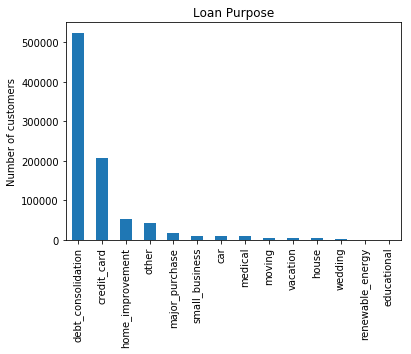

In [116]:
fig = data['purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

## Home Ownership

In [106]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [107]:
data.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

Text(0,0.5,'Number of customers')

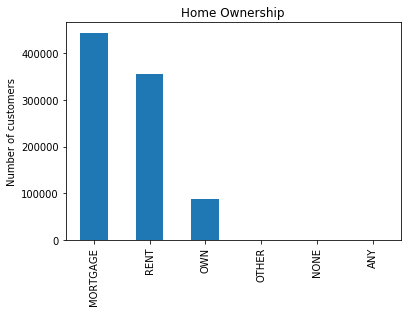

In [108]:

fig = data['home_ownership'].value_counts().plot.bar()
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

## Formatting Dates

In [113]:
data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2011,2011-12-01,Jan-2015,2015-01-01
1,Dec-2011,2011-12-01,Apr-2013,2013-04-01
2,Dec-2011,2011-12-01,Jun-2014,2014-06-01
3,Dec-2011,2011-12-01,Jan-2015,2015-01-01
4,Dec-2011,2011-12-01,Jan-2016,2016-01-01


Text(0,0.5,'Disbursed Amount (US Dollars)')

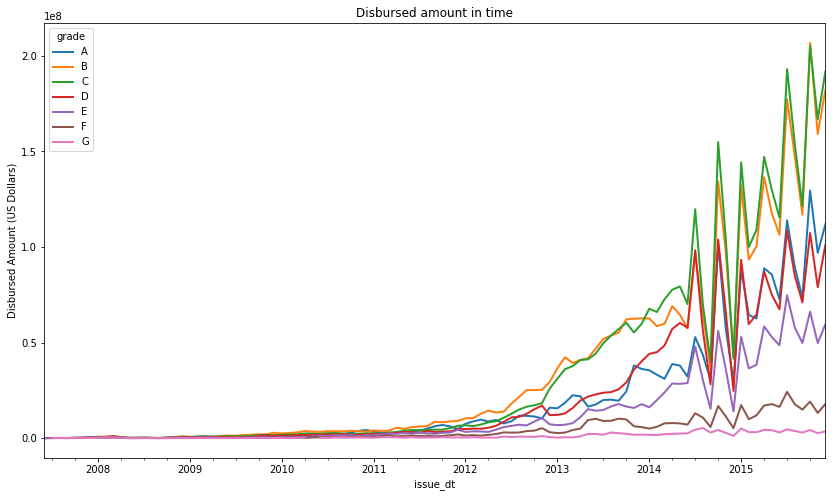

In [114]:
# Mmoney Lending Club has disbursed over the years to the different risk

fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

#### Analysis on new dataset

In [119]:
ds = pd.read_csv('sample_s2.csv')
ds.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [120]:
ds.shape

(887379, 2)

In [121]:
ds.open_il_24m.value_counts()

A       500548
C       300000
B        65459
1.0       6436
0.0       5481
2.0       4448
3.0       2468
4.0       1249
5.0        606
6.0        309
7.0        163
8.0         81
9.0         47
10.0        28
11.0        23
12.0        17
13.0         7
14.0         6
15.0         2
19.0         1
Name: open_il_24m, dtype: int64

Text(0,0.5,'Number of borrowers')

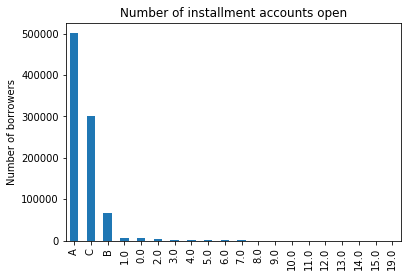

In [122]:
fig = ds.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

## Analysis on employee title and length

In [137]:
dss=pd.read_csv('loan.csv', usecols=['emp_title','emp_length'])
dss.head()

,emp_title,emp_length
0,NaN,10+ years
1,Ryder,< 1 year
2,NaN,10+ years
3,AIR RESOURCES BOARD,10+ years
4,University Medical Group,1 year


In [138]:
# let's check the amount of missing data
dss.isnull().mean()

emp_title     0.057988
emp_length    0.000000
dtype: float64

In [139]:
len(dss.emp_title.unique())

299273

In [140]:
dss.emp_title.value_counts()

Teacher                                     13469
Manager                                     11240
Registered Nurse                             5525
Owner                                        5376
RN                                           5355
Supervisor                                   4983
Sales                                        4212
Project Manager                              3988
Driver                                       3569
Office Manager                               3510
General Manager                              3178
Director                                     3156
manager                                      3138
teacher                                      2925
owner                                        2849
Engineer                                     2671
President                                    2598
driver                                       2429
Vice President                               2351
Attorney                                     2136


In [132]:
data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'],
      dtype=object)

In [141]:
dss.emp_length.value_counts() / len(data)

10+ years    0.328573
2 years      0.088880
< 1 year     0.079566
3 years      0.078913
1 year       0.064341
5 years      0.062774
4 years      0.059196
n/a          0.050514
7 years      0.050254
8 years      0.049534
6 years      0.048401
9 years      0.039055
Name: emp_length, dtype: float64

In [142]:
length_dict = {k:'0-10 years' for k in dss.emp_length.unique()}
length_dict['10+ years']='10+ years'
length_dict['n/a']='n/a'


length_dict

{'1 year': '0-10 years',
 '10+ years': '10+ years',
 '2 years': '0-10 years',
 '3 years': '0-10 years',
 '4 years': '0-10 years',
 '5 years': '0-10 years',
 '6 years': '0-10 years',
 '7 years': '0-10 years',
 '8 years': '0-10 years',
 '9 years': '0-10 years',
 '< 1 year': '0-10 years',
 'n/a': 'n/a'}

In [144]:
data['emp_length_redefined'] = dss.emp_length.map(length_dict)
data.emp_length_redefined.unique()

array(['10+ years', '0-10 years', 'n/a'], dtype=object)

In [145]:
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,defaulted,issue_dt,last_pymnt_dt,emp_length_redefined
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2011-12-01,2015-01-01,10+ years
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2011-12-01,2013-04-01,0-10 years
